In [1]:
import numpy as np

np.random.seed(1)

# make data of two engangled rings used in the paper
def make_rings(points_per_ring, n_rings):
    data = np.zeros((n_rings * points_per_ring, 3))
    if n_rings == 2:
        for i in range(points_per_ring):
            data[i] = 1000 * np.array([np.sin(i * 2 * np.pi / points_per_ring), np.cos(i * 2 * np.pi / points_per_ring), 0])
            data[i + points_per_ring] = 1000 * np.array([np.sin(i * 2 * np.pi / points_per_ring) + 1, 0, np.cos(i * 2 * np.pi / points_per_ring)])
    if n_rings == 4:
        for j in range(n_rings):
            for i in range(points_per_ring):
                if j%2 == 0:
                    data[i + j * points_per_ring] = 1000 * np.array([np.sin(i * 2 * np.pi / points_per_ring) + 4 / 3 * j, np.cos(i * 2 * np.pi / points_per_ring), 0])
                else:
                    data[i + j * points_per_ring] = 1000 * np.array([np.sin(i * 2 * np.pi / points_per_ring) + 4 / 3 * j, 0, np.cos(i * 2 * np.pi / points_per_ring)])
    ylabel = np.array([int(i/points_per_ring) for i in range(n_rings * points_per_ring)])
    return data, ylabel

ring1, ring1_label = make_rings(100, 2)

np.save('../data/ring1', ring1)
np.save('../data/ring1_label', ring1_label)

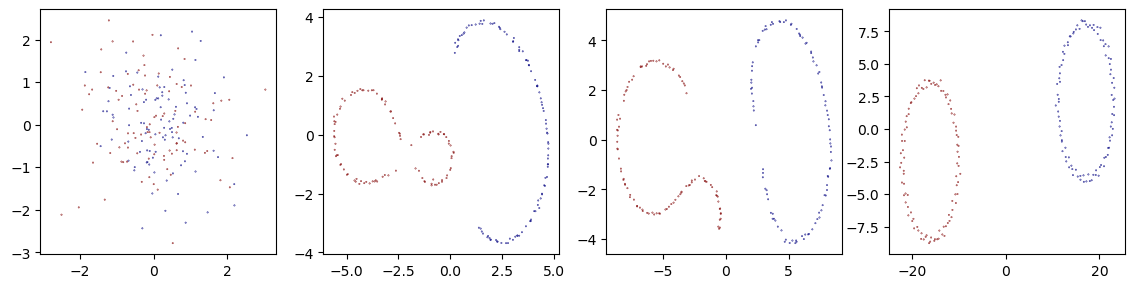

In [2]:
import model
import matplotlib.pyplot as plt

np.random.seed(1)

total_epoch = 10000

# Conduct Hebbian t-SNE for the data of two entangled rings. 
model.hebbtsne(data_index=0, epoch_number=total_epoch, filename='ringtsne20', calculate_linsep=True, calculate_kl=True, set_perplexity=20.0)

npz_comp = np.load('../data/ringtsne20.npz')
w, w_timecourse, label = npz_comp['arr_0'], npz_comp['arr_4'], npz_comp['arr_5']

fig = plt.figure(figsize=(14, 7))
ax = fig.add_subplot(2, 4, 4)
ax.scatter(w[:, 0], w[:, 1], c=label, cmap='jet', s=0.1)    

for i in range(3):
    ax = fig.add_subplot(2, 4, 1+i)
    ax.scatter(w_timecourse[i, :, 0], w_timecourse[i, :, 1], c=label, cmap='jet', s=0.1)

plt.show()